In [1]:
import torch
import numpy as np
import sympy
from core.hamiltonian import ChainPendulum, EuclideanAndGravityDynamics, Animation2d, GravityHamiltonian
from torchdiffeq import odeint
from IPython.display import HTML
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload

%autoreload 2

In [2]:
# points = torch.cat([torch.tensor([[0.],[0.]]),ic[0,0].T],dim=1)
# plt.plot(*points)
# plt.quiver(*ic[0,0].T,*ic[0,1].T)
# # plt.ylim(-3,0.5)
# # plt.xlim(-2,2.5)
# plt.axes().set_aspect('equal', 'datalim')

In [27]:
body = ChainPendulum(3,beams=False)
z0 = body.sample_initial_conditions(1)
z0[:,1] = body.M@z0[:,1]*2
bs,n,d,_ = z0.shape
z0 = z0.reshape(bs,2*n*d)

In [28]:
z0

tensor([[-0.0963, -0.9954,  0.6923, -1.6103,  1.6774, -1.7822,  1.2516, -0.1211,
         -0.1485, -1.9163,  0.2379,  0.2977]])

In [39]:
ts = torch.linspace(0,50,1000)

In [40]:
dynamics = EuclideanAndGravityDynamics(body)
with torch.no_grad():
    zs = odeint(dynamics, z0, ts, rtol=1e-4, method='rk4').permute(1, 0, 2)

In [31]:
zs.shape

torch.Size([1, 500, 12])

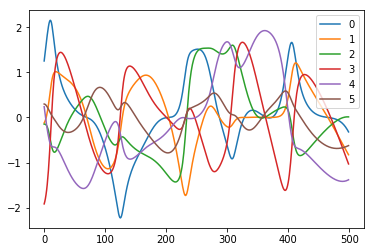

In [32]:
for i in range(6,12):
    plt.plot(zs[0,:,i])
plt.legend(range(i))

In [33]:
GravityHamiltonian(body.M,body.Minv,None,zs[0])

tensor([-1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775, -1.6775,
        -1.6775, -1.6775, -1.6775, -1.67

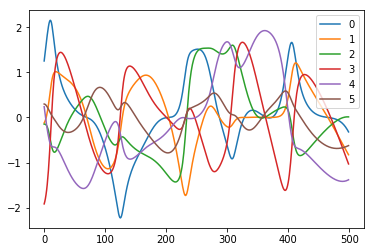

In [34]:
xt = zs[0,:,:6].reshape(len(ts),3,2).permute(1,2,0)
pt = zs[0,:,6:].reshape(len(ts),3,2).permute(1,2,0)
for i in range(6,12):
    plt.plot(zs[0,:,i])
plt.legend(range(i))

In [35]:
zs[0,1]

tensor([-0.0700, -0.9975,  0.6893, -1.6482,  1.6811, -1.7763,  1.3687, -0.0961,
        -0.1478, -1.8658,  0.1311,  0.2938])

In [36]:
xt.shape

torch.Size([3, 2, 500])

In [37]:
(pt[0]**2).sum(0)

tensor([1.5812e+00, 1.8827e+00, 2.2113e+00, 2.5654e+00, 2.9423e+00, 3.3363e+00,
        3.7378e+00, 4.1306e+00, 4.4906e+00, 4.7861e+00, 4.9829e+00, 5.0539e+00,
        4.9899e+00, 4.8047e+00, 4.5302e+00, 4.2046e+00, 3.8616e+00, 3.5258e+00,
        3.2117e+00, 2.9261e+00, 2.6708e+00, 2.4449e+00, 2.2459e+00, 2.0710e+00,
        1.9171e+00, 1.7814e+00, 1.6615e+00, 1.5551e+00, 1.4603e+00, 1.3755e+00,
        1.2992e+00, 1.2302e+00, 1.1676e+00, 1.1103e+00, 1.0577e+00, 1.0090e+00,
        9.6372e-01, 9.2126e-01, 8.8120e-01, 8.4314e-01, 8.0674e-01, 7.7168e-01,
        7.3769e-01, 7.0456e-01, 6.7207e-01, 6.4005e-01, 6.0835e-01, 5.7686e-01,
        5.4548e-01, 5.1413e-01, 4.8276e-01, 4.5134e-01, 4.1988e-01, 3.8837e-01,
        3.5687e-01, 3.2544e-01, 2.9417e-01, 2.6317e-01, 2.3259e-01, 2.0262e-01,
        1.7347e-01, 1.4539e-01, 1.1867e-01, 9.3650e-02, 7.0688e-02, 5.0191e-02,
        3.2588e-02, 1.8329e-02, 7.8667e-03, 1.6456e-03, 7.8397e-05, 3.5271e-03,
        1.2283e-02, 2.6550e-02, 4.6431e-

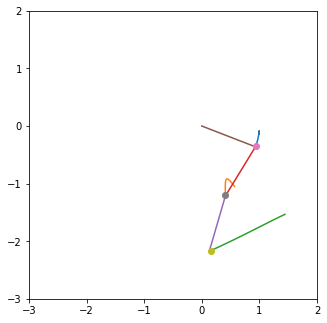

In [38]:
HTML(Animation2d(xt,body).animate().to_html5_video())